#### Developed an automated machine learning model to estimate insurance premiums for new medical insurance policies. The model leverages key input features, including age, gender, BMI, number of dependents, smoking status, and region of residence, to accurately predict premium charges.

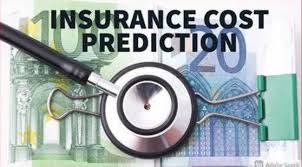

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [4]:
df = pd.read_csv("/content/sample_data/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Categorical Variables

Sex

Smoker

Region

In [ ]:
# checking for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
import plotly.express as px
import matplotlib
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [ ]:
df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(df,
                   x='age',
                   marginal='box',
                   nbins=57,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1, height=600)
fig.show()

## Body Mass Index

The distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [ ]:
fig = px.histogram(df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1, height=600)
fig.show()

### The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1, height=600)
fig.show()

most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers.

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1, height=600)
fig.show()

In [ ]:
#Smoker
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
#Smokers Distribution by Sex
fig = px.histogram(
    df,
    x='smoker',
    color='sex',
    title='Smokers Distribution by Sex'
)

fig.update_layout(
    width=800,
    height=600
)

fig.show()

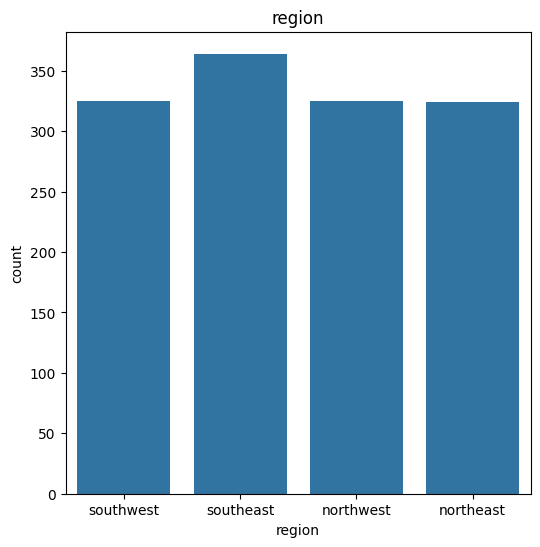

In [ ]:
# region column
plt.figure(figsize=(6,6))
sn.countplot(x='region', data=df)
plt.title('region')
plt.show()

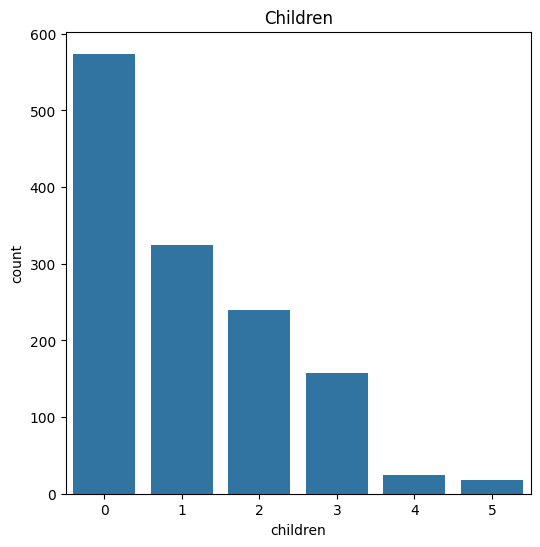

In [ ]:
# children column
plt.figure(figsize=(6,6))
sn.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [ ]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


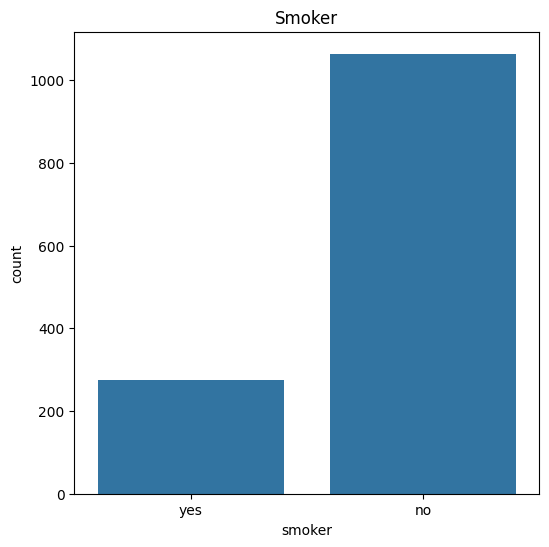

In [ ]:
# region column
plt.figure(figsize=(6,6))
sn.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


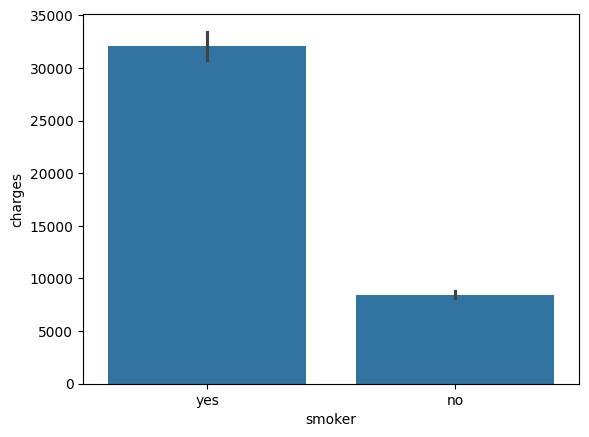

In [ ]:
sns.barplot(data=df, x='smoker', y='charges');

<Axes: xlabel='sex', ylabel='charges'>

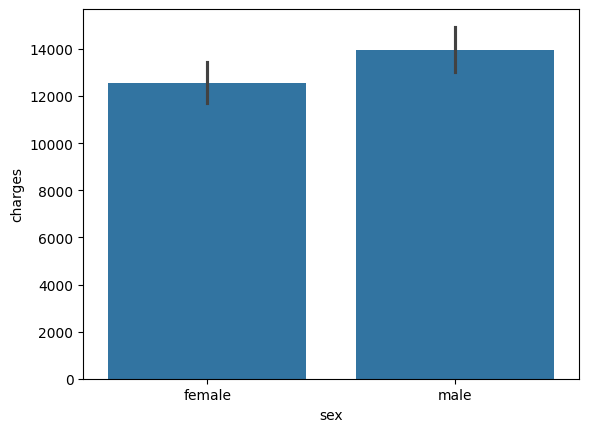

In [ ]:
sns.barplot(data=df, x='sex', y='charges')

In [ ]:
fig = px.scatter(df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 height=600,
                 title='Age vs. Charges')
fig.update_traces(marker_size= 5)
fig.show()

In [ ]:
fig = px.scatter(df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 height=600,
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
sex_values = {'male': 0, 'female': 1}
sex_numeric = df.sex.map(sex_values)
df.charges.corr(sex_numeric)

-0.057292062202025484

In [ ]:
# Encode non-numeric columns
for column in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

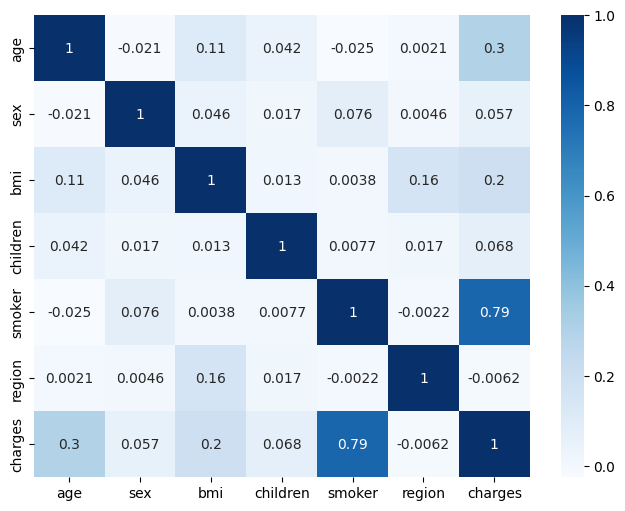

In [ ]:
#Heatmap
plt.figure(figsize=(8,6))
sn.heatmap(df.corr(), annot=True, cmap='Blues')

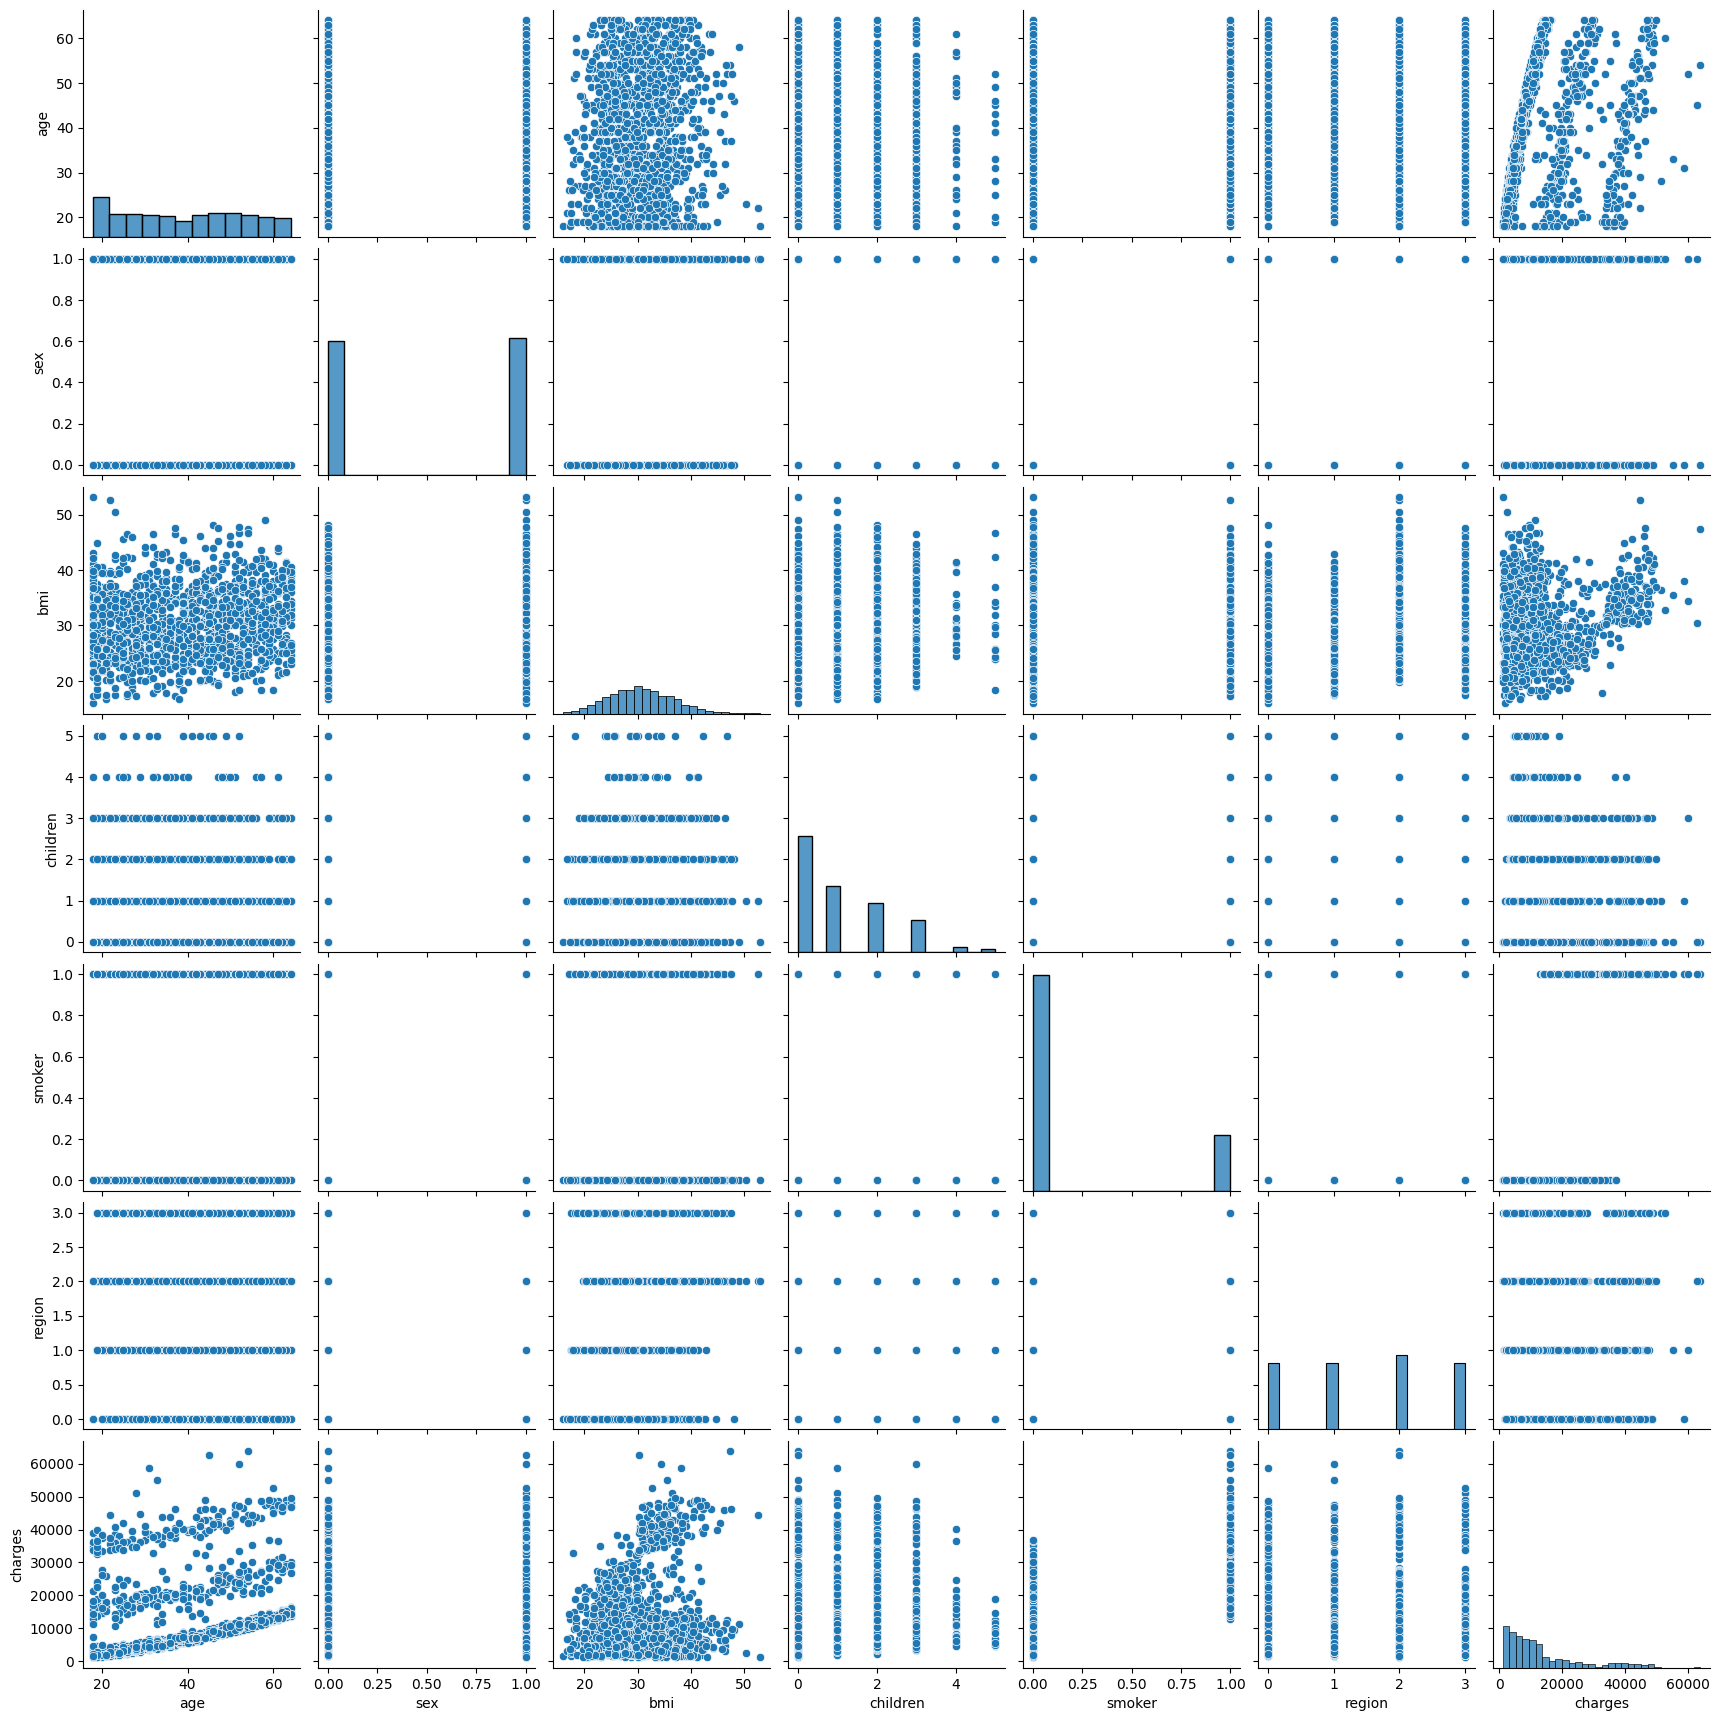

In [ ]:
sn.pairplot(df)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
non_smoker_df = df[df.smoker == 0]

In [ ]:
non_smoker_df.head(4)

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


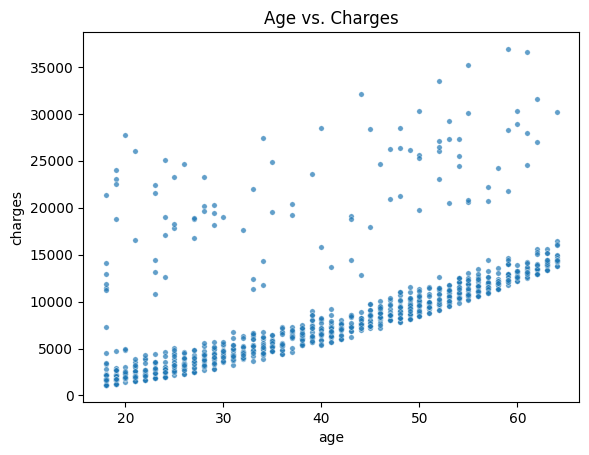

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

## Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

charges=w×age+b

We'll try determine ww and bb for the line that best fits the data.

    This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

    The numbers ww and bb are called the parameters or weights of the model.

    The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute charges, given age, w and b.

In [ ]:
#create a function
def estimate_charges(age, w, b):
    return w * age + b

The estimate_charges function is our very first model.

Let's guess the values for w and b and use them to estimate the value for charges.

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

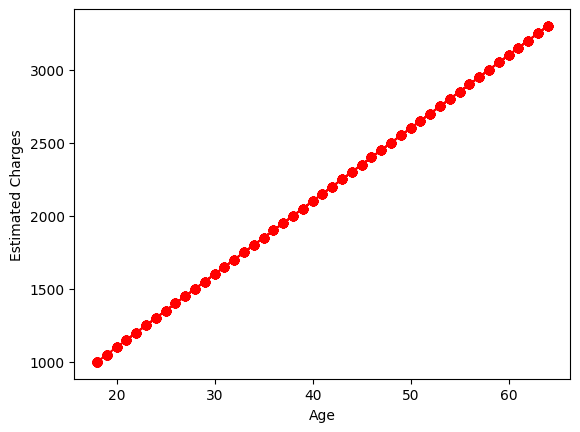

In [ ]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our model fits the data.

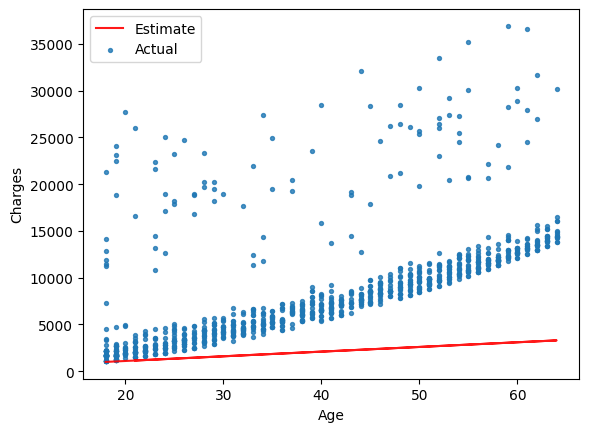

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

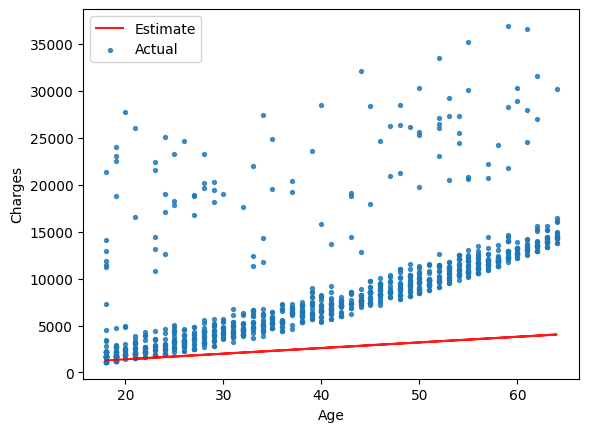

In [ ]:
try_parameters(60, 200)

Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

    Calculate the difference between the targets and predictions (the differenced is called the "residual")
    Square all elements of the difference matrix to remove negative values.
    Calculate the average of the elements in the resulting matrix.
    Take the square root of the result

The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:
[WCanPkA.png](attachment:638de68c-d689-4397-8dfc-3359c595da59.png)


Geometrically, the residuals can be visualized as follows:
![ll3NL80.png](attachment:b662565c-dcf7-4519-9e4d-67973c095566.png)


Let's define a function to compute the RMSE.

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

## Let's compute the RMSE for our model with a sample set of weights

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949562575493

## Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.

In [ ]:
model = LinearRegression()

In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


# **Model for Non-Smokers**

In [ ]:
#Let's fit the model to the data.

model.fit(inputs, targets)

LinearRegression()

In [ ]:
## We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(targets, predictions)

4662.505766636395

In [ ]:
# w & b
model.coef_,model.intercept_

(array([267.24891283]), -2091.4205565650864)

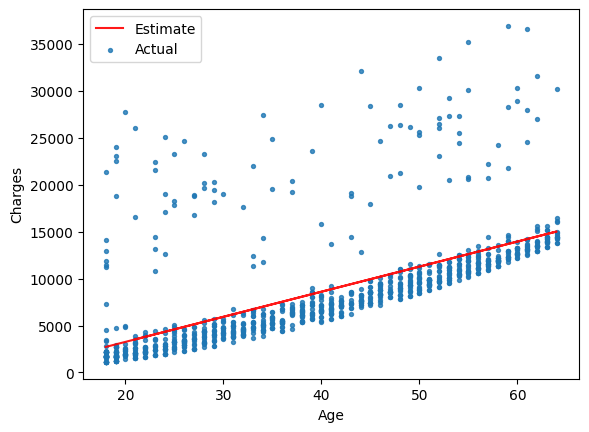

In [ ]:
try_parameters(model.coef_, model.intercept_)

In [ ]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [ ]:
print('X :', X.shape)
print('Y :', Y.shape)

X : (1338, 6)
Y : (1338,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


In [ ]:
# loading the Linear Regression model
model2 = LinearRegression()

# First complete Model

In [ ]:
model2.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# w & b
model2.coef_,model2.intercept_

(array([  251.36689613,   -35.4338166 ,   330.76133485,   589.05862101,
        23905.96516848,  -323.62760276]),
 -11747.4671720888)

In [ ]:
cat_cols = ['smoker', 'sex']
categorical_data = df[cat_cols].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age', 'bmi', 'children', 'region']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 'Intercept'),
    'weight': np.append(model2.coef_, model2.intercept_)
})

# Sort the DataFrame by weight
weights_df = weights_df.sort_values('weight', ascending=False)
print(weights_df)

     feature        weight
4     smoker  23905.965168
3     region    589.058621
2   children    330.761335
0        age    251.366896
1        bmi    -35.433817
5        sex   -323.627603
6  Intercept -11747.467172


In [ ]:
# prediction on training data
training_data_prediction =model2.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7519923667088932


In [ ]:
# Compute loss to evalute the model
loss = rmse(Y_train, training_data_prediction)
print('Train Loss:', loss)

Train Loss: 6008.670641259382


In [ ]:
# prediction on test data
test_data_prediction =model2.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7445422986536503


In [ ]:
# Compute loss to evalute the model
loss = rmse(Y_test, test_data_prediction)
print('Test Loss:', loss)

Test Loss: 6193.935113523997


Because different columns have different ranges, we run into two issues:

    We can't compare the weights of different column to identify which features are important
    A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![dT5fLFI.png](attachment:37fc9293-f2d1-430e-87ca-f7ade8e9f761.png)

We can apply scaling using the StandardScaler class from scikit-learn.

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779,  1.51569507])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664,   1.2198583 ])

In [ ]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367,  1.34390459],
       [-1.50996545,  0.5096211 , -0.07876719,  0.43849455],
       [-0.79795355,  0.38330685,  1.58092576,  0.43849455],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367,  0.43849455],
       [-1.29636188, -0.79781341, -0.90861367,  1.34390459],
       [ 1.55168573, -0.26138796, -0.90861367, -0.46691549]])

In [ ]:
scaled_df = pd.DataFrame(scaled_inputs, columns=numeric_cols)
scaled_df

,age,bmi,children,region
0,-1.438764,-0.453320,-0.908614,1.343905
1,-1.509965,0.509621,-0.078767,0.438495
2,-0.797954,0.383307,1.580926,0.438495
3,-0.441948,-1.305531,-0.908614,-0.466915
4,-0.513149,-0.292556,-0.908614,-0.466915
...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.466915
1334,-1.509965,0.206139,-0.908614,-1.372326
1335,-1.509965,1.014878,-0.908614,0.438495
1336,-1.296362,-0.797813,-0.908614,1.343905


# Second Model After Regularisation of (age 	bmi 	children 	region)data

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.charges

# Create and train the model
model3 = LinearRegression().fit(inputs, targets)
r_squared = model3.score(inputs, targets)
# Generate predictions
predictions = model3.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)
print(f"R-squared (model3.score): {r_squared}")

Loss: 6043.811701706331
R-squared (model3.score): 0.7507372027994937


**Model Specification**

$charges = b_1 \times age + b_2 \times bmi + b_3 \times children + b_4 \times smoker + b_5 \times sex + b_6 \times region + b$

In [ ]:
# 0=female; 1= male
# 0=No; 1=Yes
#4 = northeast; 3 =southwest; 2 = southeast; 1 = northwest
df_inputs = pd.DataFrame(inputs, columns=["age","sex","bmi","children","smoker","region"])
pd.concat([df_inputs, targets], axis=1)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-0.453320,-0.908614,1.343905,1.0,0.0,16884.92400
1,-1.509965,0.509621,-0.078767,0.438495,0.0,1.0,1725.55230
2,-0.797954,0.383307,1.580926,0.438495,0.0,1.0,4449.46200
3,-0.441948,-1.305531,-0.908614,-0.466915,0.0,1.0,21984.47061
4,-0.513149,-0.292556,-0.908614,-0.466915,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.466915,0.0,1.0,10600.54830
1334,-1.509965,0.206139,-0.908614,-1.372326,0.0,0.0,2205.98080
1335,-1.509965,1.014878,-0.908614,0.438495,0.0,0.0,1629.83350
1336,-1.296362,-0.797813,-0.908614,1.343905,0.0,0.0,2007.94500


## Building a Predictive System

In [ ]:
input_data = (-1.438764,-0.453320, 	-0.908614, 	1.343905, 	1.0, 	0.0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[25111.24245598]
The insurance cost is USD  25111.242455983163


## Random Forest¶

In [ ]:
dt=RandomForestRegressor(n_estimators=10)
dt.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred=dt.predict(X_train)
train_acc=metrics.r2_score(Y_train,y_pred)

train_acc

0.9695788225361871

In [ ]:
y1_pred=dt.predict(X_test)
test_acc=metrics.r2_score(Y_test,y1_pred)

test_acc

0.8257546158063296

## XGBoost

In [ ]:
xb=XGBRFRegressor()
xb.fit(X_train,Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
x_pred=xb.predict(X_train)
trainn_acc=metrics.r2_score(Y_train,x_pred)

trainn_acc

0.9059801279335391

In [ ]:
x1_pred=xb.predict(X_test)
testt_acc=metrics.r2_score(Y_test,x1_pred)

testt_acc

0.8652226300368335

## Decision Tree

In [ ]:
mt=DecisionTreeRegressor()
mt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
d_pred=mt.predict(X_train)
trainnn_acc=metrics.r2_score(Y_train,d_pred)

trainnn_acc

1.0

In [ ]:
d1_pred=mt.predict(X_test)
testd_df=metrics.r2_score(Y_test,d1_pred)

testd_df

0.7612620918295904

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
input_data = (19, 	0 ,	27.900, 	0, 	1, 	3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dt.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[16904.5396]
The insurance cost is USD  16904.5396


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [ ]:
input_data = (19, 	0 ,	27.900, 	0, 	1, 	3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = xb.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[18362.865]
The insurance cost is USD  18362.865


### The objective of this section is to demonstrate how to visualize the impact of independent variables on the target variable (Charges) for research purposes.

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to inputs for the intercept
inputs = sm.add_constant(inputs)

# Fit the model
model = sm.OLS(targets, inputs).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:44:28   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8458.6374    246.361     34.334      0.0

In [ ]:
# Define feature names
feature_names = ["const","age", "sex", "bmi", "children", "smoker", "region"]

# Convert inputs to a DataFrame with feature names
inputs_df = pd.DataFrame(inputs, columns=feature_names)

# Add a constant to inputs for the intercept
inputs_df = sm.add_constant(inputs_df)

# Flatten the target array to 1D
targets = targets.ravel()

# Fit the model
model = sm.OLS(targets, inputs_df).fit()

# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:44:38   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8458.6374    246.361     34.334      0.0

<ipython-input-93-1438cb63339b>:11: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



The Ordinary Least Squares (OLS) regression model explains 75.1% of the variation in the dependent variable (R-squared = 0.751), indicating a good fit. The adjusted R-squared (0.750) confirms this fit while accounting for the number of predictors. The F-statistic of 668.1 (p < 0.001) shows the overall model is statistically significant. Among the predictors, age, sex, BMI, and smoker status are statistically significant (p < 0.05), with smoker status showing the strongest positive effect (coefficient = 23,820). In contrast, region is not statistically significant (p = 0.694), suggesting it does not contribute meaningfully to the model. The intercept (8458.64) represents the baseline value of the dependent variable when all predictors are zero. Diagnostic tests indicate potential non-normality of residuals (Omnibus and Jarque-Bera tests, p < 0.001), but the Durbin-Watson statistic (2.088) suggests no significant autocorrelation.